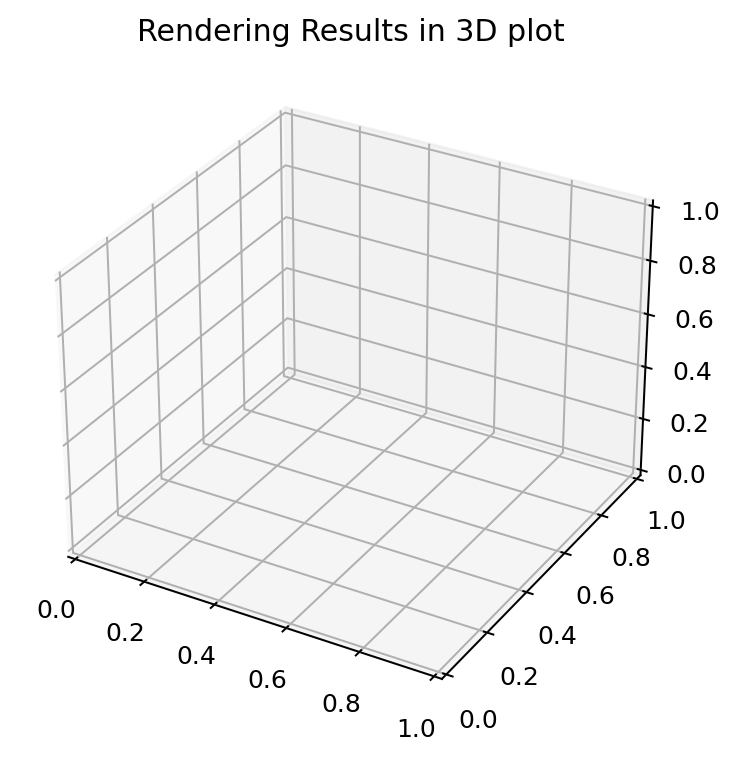

In [4]:
# Import the libraries
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Getting 2 mediapipe components
mp_pose = mp.solutions.pose  # for detecting the body pose
mp_hands = mp.solutions.hands  # for detecting the palm and fingers
mp_drawing = mp.solutions.drawing_utils

# Create the instance of pose class
pose = mp_pose.Pose()

# Create a Hands object with the specified minimum detection and tracking confidences.
hands = mp_hands.Hands(min_detection_confidence=0.9, min_tracking_confidence=0.7, max_num_hands=6)

# Initialize the VideoCapture instance for capturing the object
cap = cv2.VideoCapture(0)

# Create a named window with the WINDOW_NORMAL Flag
cv2.namedWindow("Hand, Body Pose Detection + Face Detection", cv2.WINDOW_NORMAL)
window_width = 1080
window_height = 720
cv2.resizeWindow("Hand, Body Pose Detection + Face Detection", window_width, window_height)

# Load the Haar Cascade XML file for face detection
face_cascade = cv2.CascadeClassifier("E:/Machine_learning_practice/Face_detection_real_time/haarcascade_frontalface_default.xml")

# create a 3D plot
fig = plt.figure(dpi=180)
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Rendering Results in 3D plot")

while True:
    ret, frame = cap.read()

    # Face detection using Haar Cascade Classifier
    gray_scale_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_scale_image, 1.1, 4)

    for (x, y, w, h) in faces:
        center_x = x + w // 2
        center_y = y + h // 2
        radius = min(w, h) // 2 + 10
        cv2.circle(frame, (center_x, center_y), radius - 4, (102, 204, 0), 4)
        cv2.circle(frame, (center_x, center_y), radius, (153, 0, 76), 4)

        # Exclude the region around the face from further processing
        frame[y:y+h, x:x+w] = 0

    # Hand and body pose detection using MediaPipe
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = cv2.flip(image, 1)
    image.flags.writeable = False

    hand_results = hands.process(image)
    entire_body_pose_results = pose.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Rendering hand results
    if hand_results.multi_hand_landmarks:
        for landmarks in hand_results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, landmarks, mp_hands.HAND_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),
                                      mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))

    # Rendering body pose results
    if entire_body_pose_results.pose_landmarks:
        mp_drawing.draw_landmarks(image, entire_body_pose_results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))

    cv2.imshow("Hand, Body Pose Detection + Face Detection", image)

    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()
cap.release()
